## **Dataset Description**


**Data Content**

**age** - age in years

**sex** - sex (1 = male; 0 = female)

**cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

**chol** - serum cholestoral in mg/dl

**fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**restecg** - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

**ca** - number of major vessels (0-3) colored by flourosopy

**thal** - 2 = normal; 1 = fixed defect; 3 = reversable defect

**num** - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

**o2** - oxygen level

## **Importing required libraries**

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc

from sklearn.metrics import classification_report

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report, accuracy_score

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.initializers import GlorotUniform

## **Importing data**

In [43]:
df = pd.read_csv('heart.csv')
o2 = pd.read_csv('o2Saturation.csv')
data =  pd.concat([df, o2], axis=1, join='inner')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,97.5
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,97.5
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,97.5
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,97.5
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,97.5


In [44]:
data.shape

(303, 15)

## **Data information**

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  98.6      303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [47]:
data.rename(columns={'98.6': 'o2'}, inplace=True)
data = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'o2', 'output']]
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,98.6,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,98.6,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,98.6,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,98.1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,97.5,1


In [48]:
# seperating the numerical and categorical features

numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'o2']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
target = 'output'

print("Variables:", len(numerical) + len(categorical))
print("Number of Categorical Variables:", len(categorical))
print("Number of Numeric Variables:", len(numerical))

Variables: 15
Number of Categorical Variables: 9
Number of Numeric Variables: 6


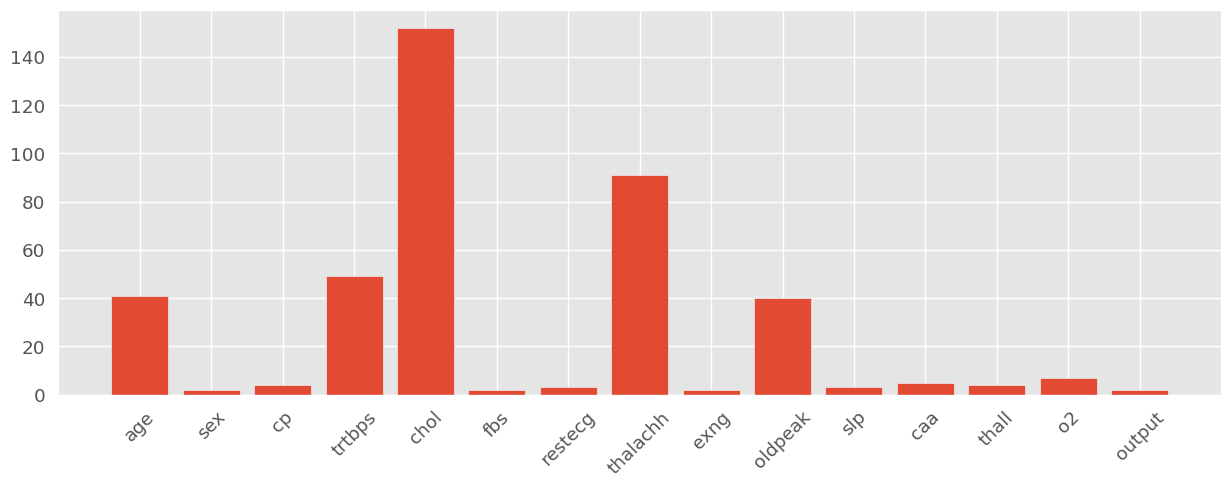

In [49]:
dict = {}
for col in data.columns:
    dict[col] = data[col].nunique()
df_unique = pd.DataFrame.from_dict(dict, orient='index', columns=['Unique Count'])

plt.figure(figsize=(15,5))
plt.bar(df_unique.index, df_unique['Unique Count'])
plt.xticks(rotation=45)
plt.show()

In [50]:
df_unique

,Unique Count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


##**Outlier detection**

In [51]:
def outlier_check(numerical):
    fig, axs = plt.subplots(ncols=len(numerical), figsize=(20, 5))
    for i, col in enumerate(numerical):
        sns.histplot(data=data, x=col, ax=axs[i])
        axs[i].set_title(col)
        min_val = data[col].min()
        percentile1 = data[col].quantile(0.01)
        percentile99 = data[col].quantile(0.99)
        max_val = data[col].max()
        print(f"Maximum value of {col}: {max_val}")
     
        # Outlier treatment, sets minimum value to 1st percentile or maximum value to 99th percentile.
        min_treat = 1
        max_treat = 0
        min_val_treated = percentile1 if min_treat == 1 else min_val
        max_val_treated = percentile99 if max_treat == 1 else max_val
        data.loc[data[col] < min_val_treated, col] = min_val_treated
        data.loc[data[col] > max_val_treated, col] = max_val_treated


Maximum value of age: 77
Maximum value of trtbps: 200
Maximum value of chol: 564
Maximum value of thalachh: 202
Maximum value of oldpeak: 6.2
Maximum value of o2: 98.6


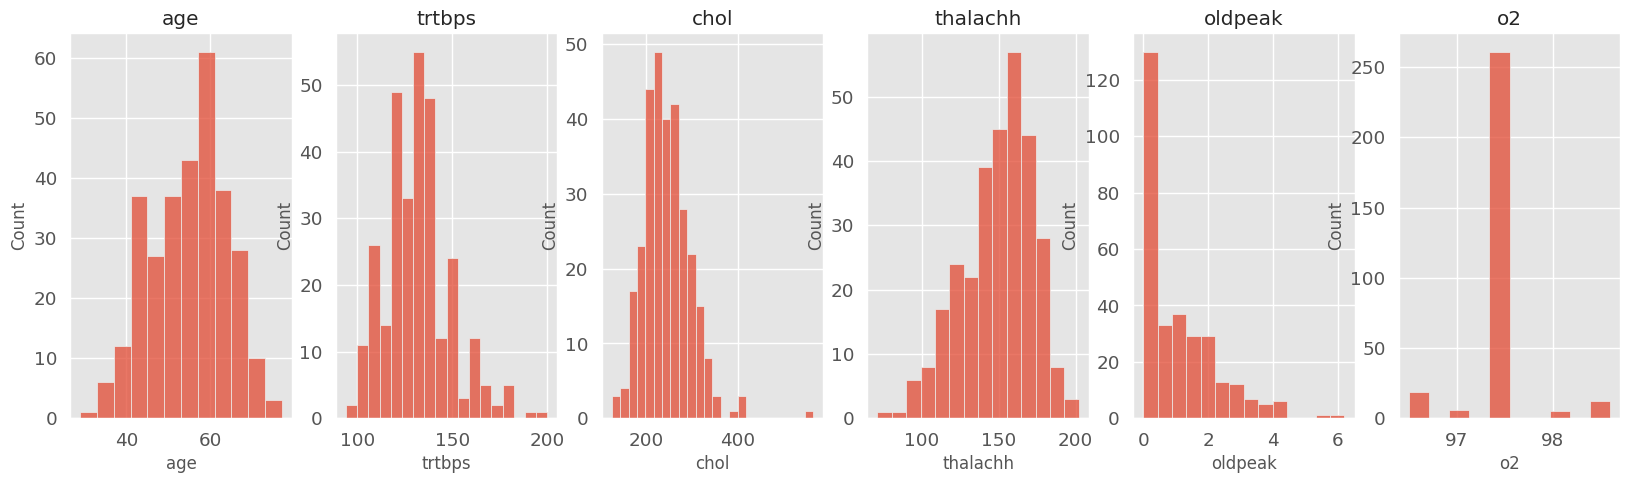

In [52]:
outlier_check(numerical)


## **Data Visualization**

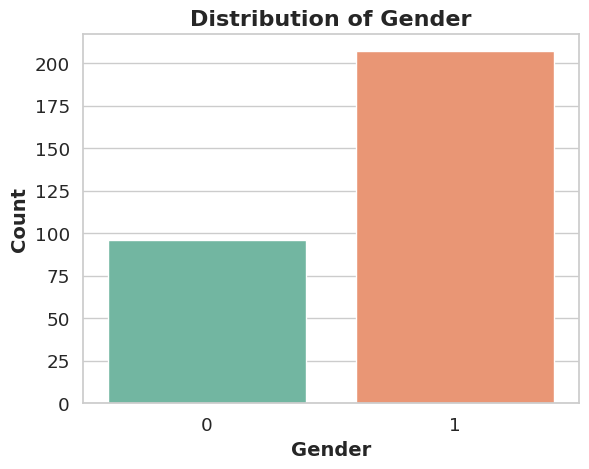

In [53]:
sns.set(style='whitegrid', font_scale=1.2)

ax = sns.countplot(x='sex', data=df, palette='Set2')
ax.set_xlabel('Gender', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Gender', fontsize=16, fontweight='bold')

plt.show()

There are more males in the dataset so the model is more biased towards males

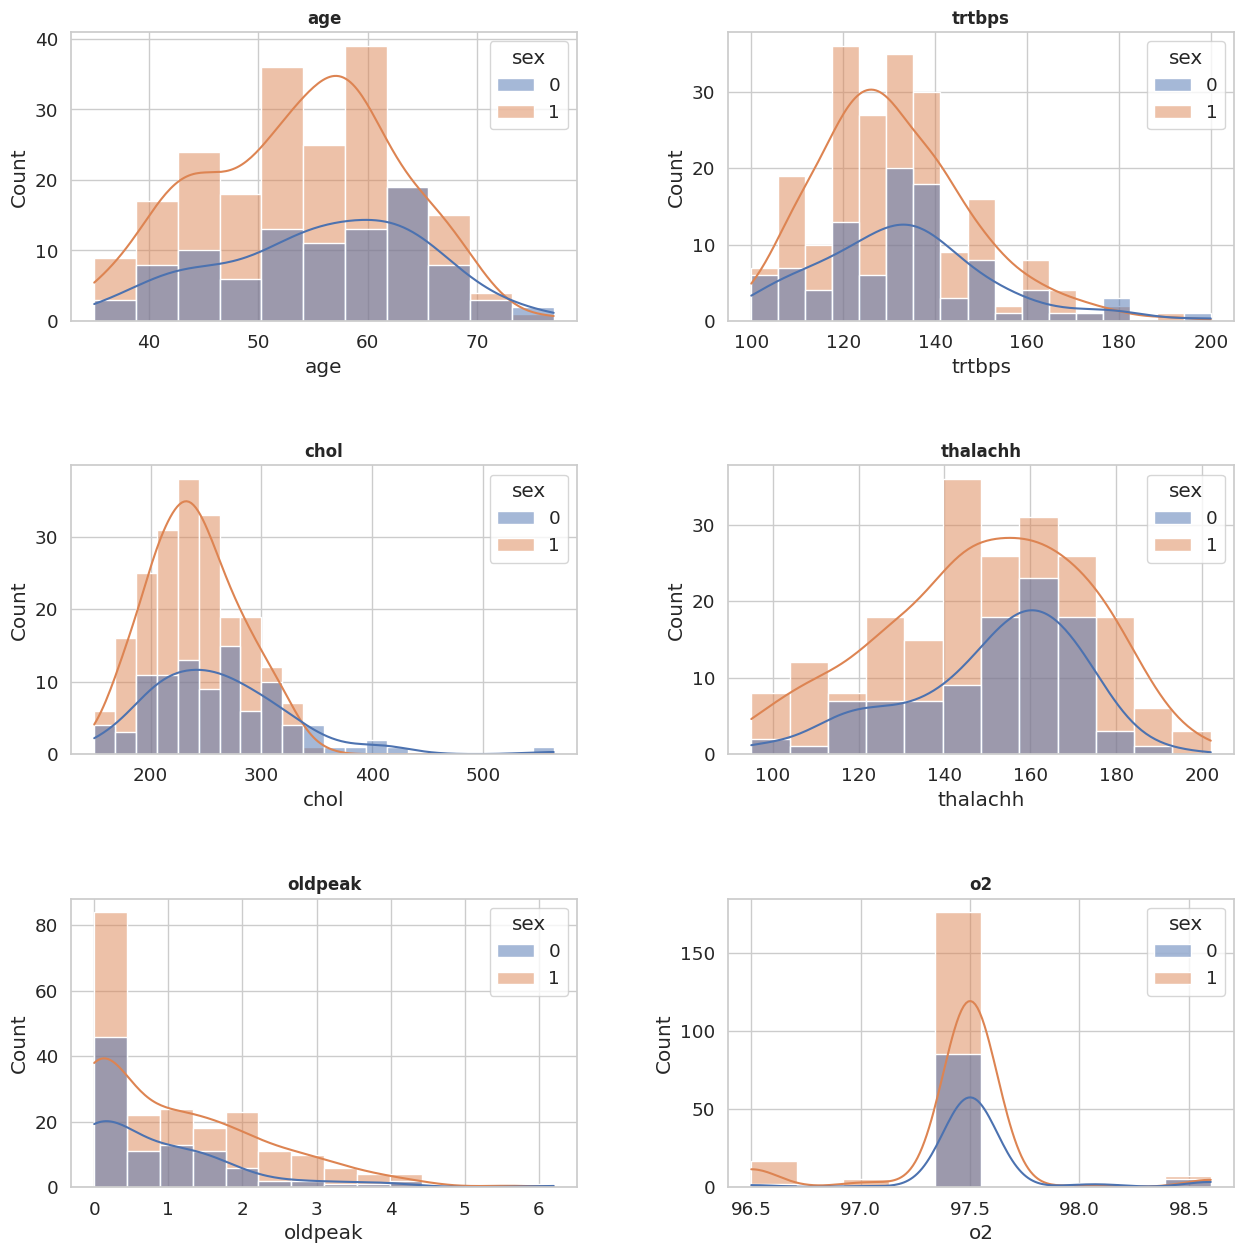

In [54]:
# visualiztion on numerical data
rows, cols = 3, 2
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
counter = 1
for i in numerical:
    if counter <= 9:
        plt.subplot(rows, cols, counter)
        sns.histplot(data=data, x=i, hue='sex',kde=True)
        title_font = {'fontsize': 12, 'fontweight': 'bold'}
        plt.title(i, fontdict=title_font)
        counter = counter + 1


### Observations

There are more males in this. <br>
The resting blood pressure is right skewed.<br>
There are more males with a lower resting blood pressure than females.<br>
There are more females with a higher cholesterol level than males.<br>
The max bp is left skewed.<br>

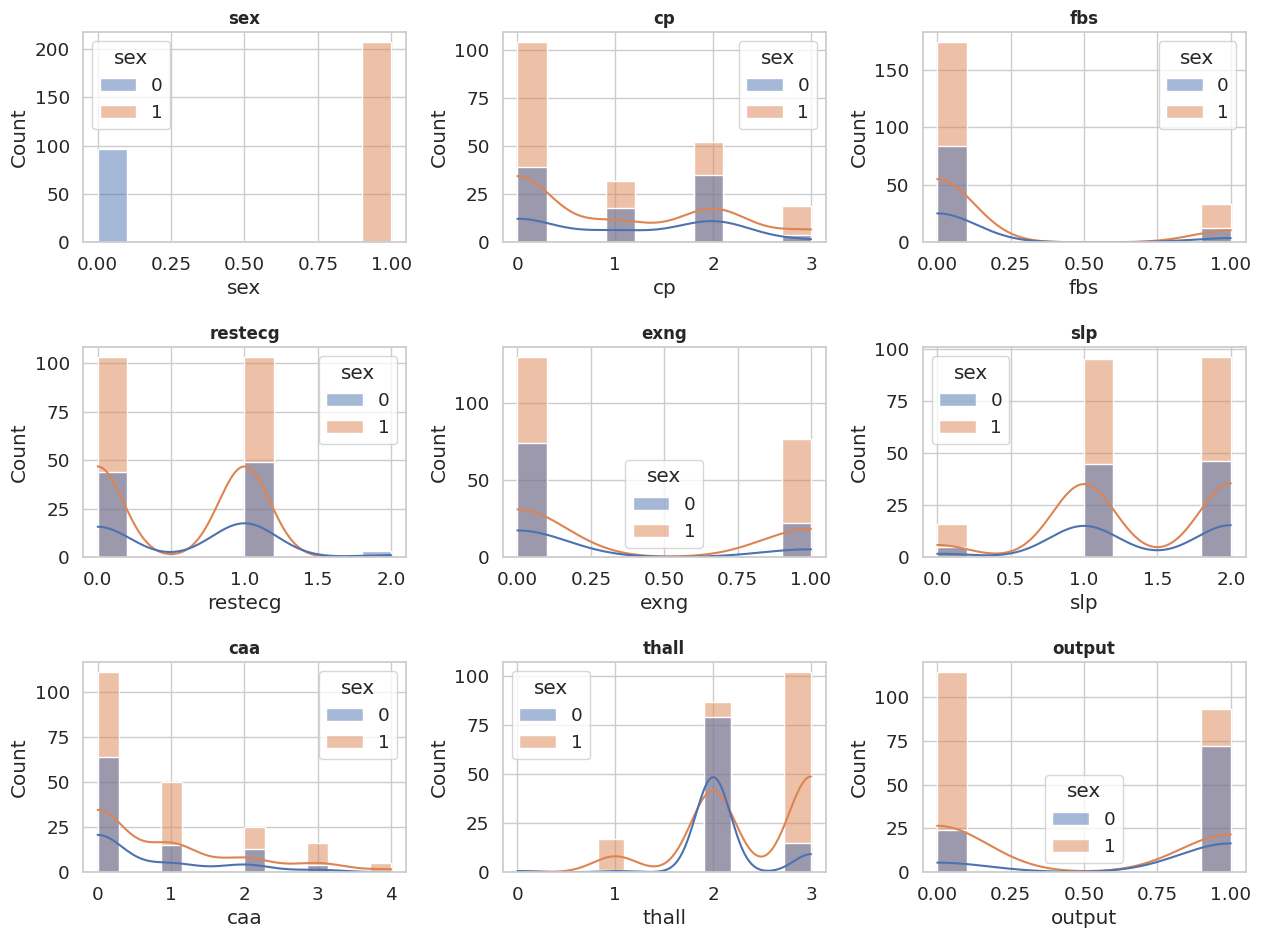

In [55]:
rows, cols = 4, 3
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
counter = 1
for i in categorical:
    if counter <= 9:
        plt.subplot(rows, cols, counter)
        sns.histplot(data=data, x=i, hue='sex',kde=True)
        title_font = {'fontsize': 12, 'fontweight': 'bold'}
        plt.title(i, fontdict=title_font)
        counter = counter + 1

### observation 

There are more asymptomatic patients with chest pain.


## **Correlation Analysis**

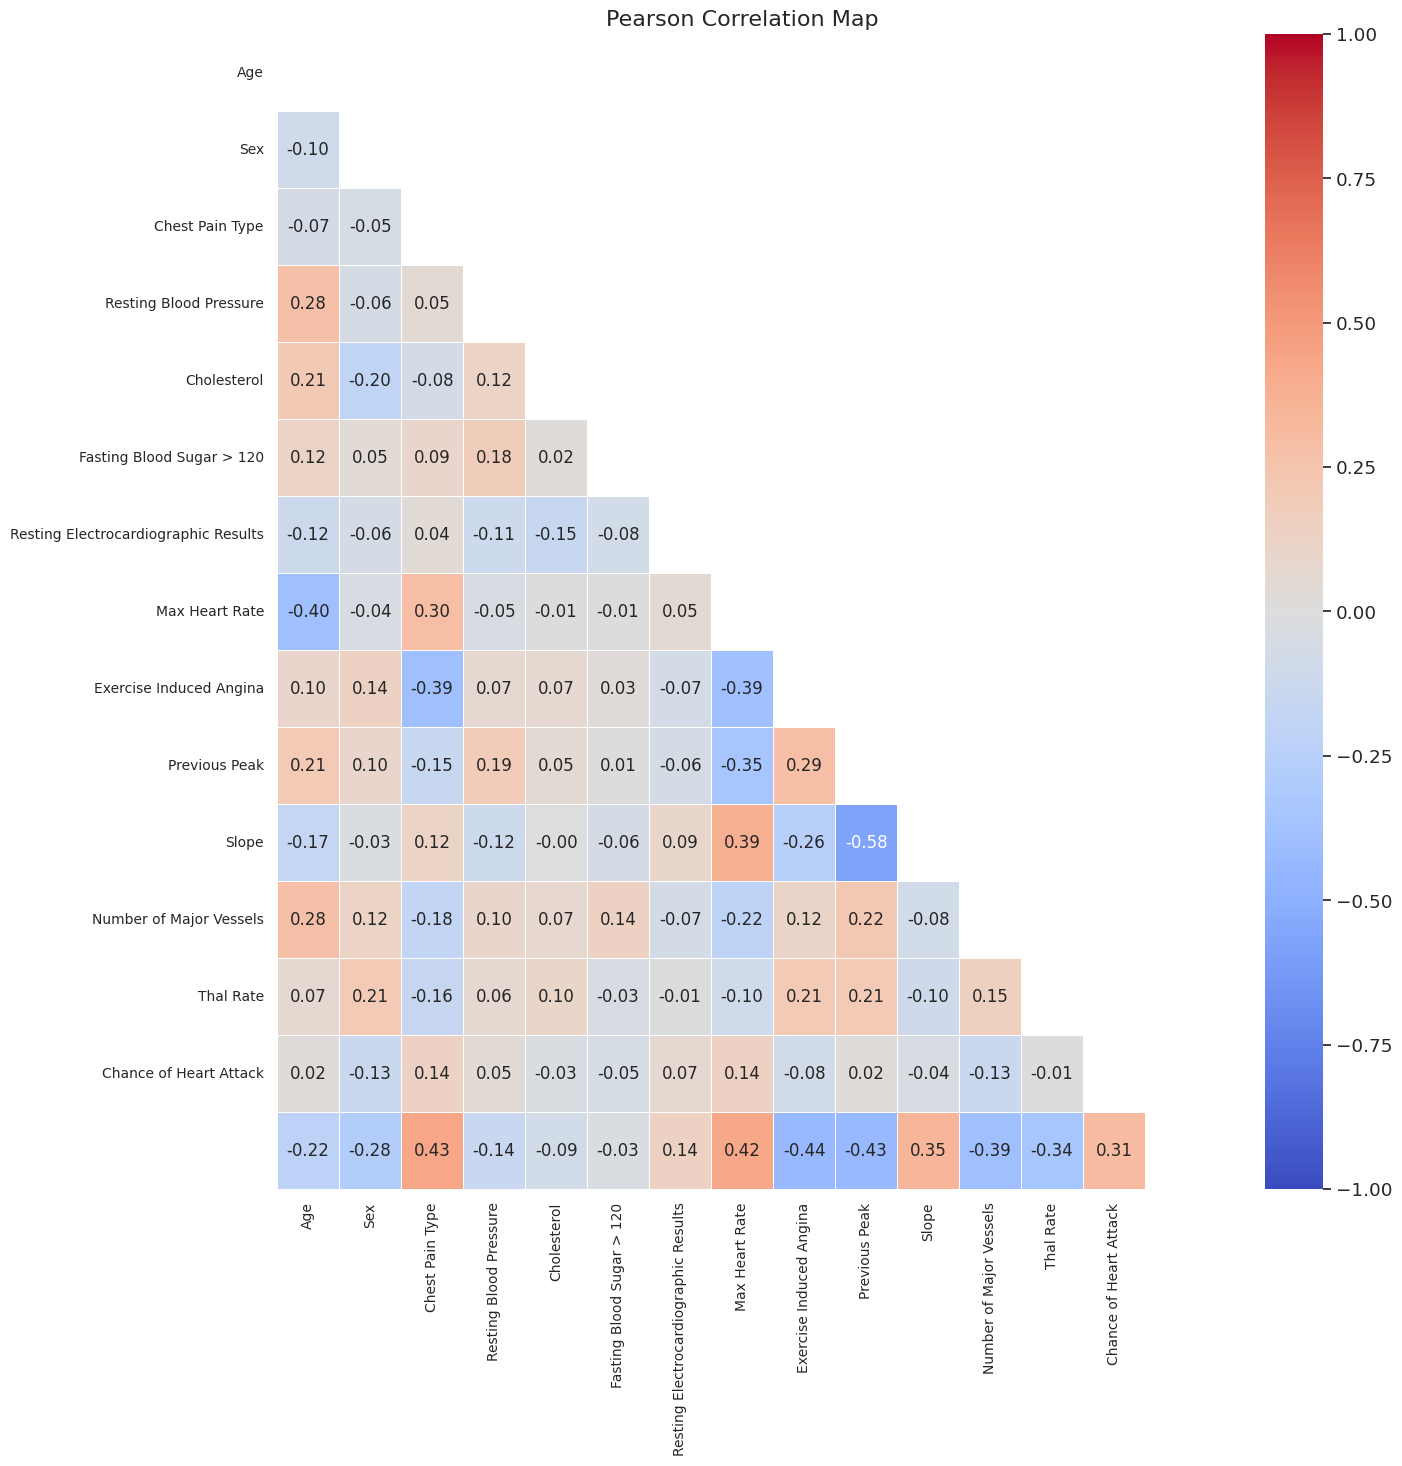

In [56]:
#Compute the Correlation matrix with all the features
sns.set_style("white")
corr_all = data.corr(method="pearson")
matrix = np.triu(corr_all)
fig, ax = plt.subplots(figsize=(15, 15))
axis_labels = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 
               'Fasting Blood Sugar > 120', 'Resting Electrocardiographic Results', 'Max Heart Rate', 
               'Exercise Induced Angina', 'Previous Peak', 'Slope', 'Number of Major Vessels', 
               'Thal Rate', 'Chance of Heart Attack']

sns.heatmap(corr_all, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt=".2f", ax=ax,
            vmin=-1, vmax=1, mask=matrix, cmap="coolwarm", linewidth=0.4, linecolor="white", annot_kws={"size": 12})
plt.xticks(rotation=90, size=10)
plt.yticks(rotation=0, size=10)
plt.title('Pearson Correlation Map', size=16)
plt.show()


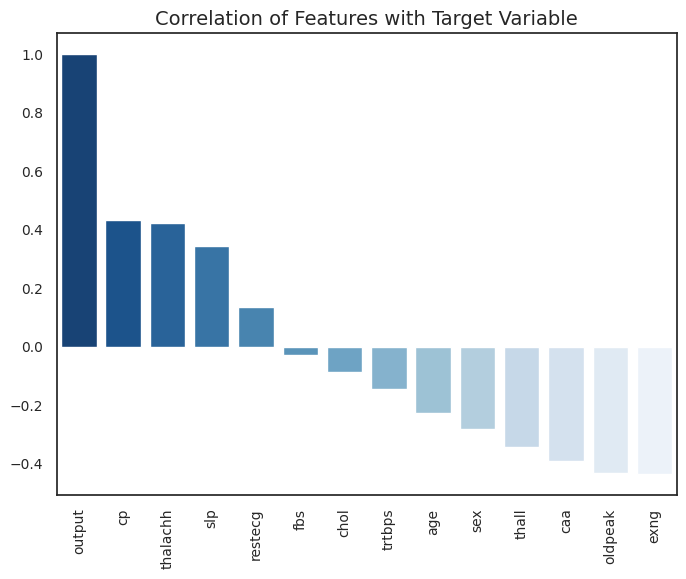

In [57]:
# Compute the correlation matrix with the target variable
corr = df.corr()['output']
corr_sort = corr.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=corr_sort.index, y=corr_sort.values, palette="Blues_r")
plt.xticks(rotation=90, size=10)
plt.yticks(size=10)
plt.title('Correlation of Features with Target Variable', size=14)
plt.show()


We can see that there are several features that have a moderate correlation with the target variable, indicating that they may be important predictors of heart disease.

In [58]:
#df[categorical] = df[categorical].astype('category')
#df_process = pd.get_dummies(df, columns=categorical, drop_first=True)

In [59]:
#df_process

In [60]:
x = data.iloc[:,:-1]

##**Normalizing the data**

In [61]:
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,o2
0,0.955987,0.681005,1.973123,0.765126,-0.261147,2.394438,-1.005832,0.010387,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,3.232954
1,-1.931769,0.681005,1.002577,-0.095428,0.069524,-0.417635,0.898962,1.652415,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,3.232954
2,-1.487498,-1.468418,0.032031,-0.095428,-0.825233,-0.417635,-1.005832,0.986728,-0.696631,0.310912,0.976352,-0.714429,-0.512922,3.232954
3,0.178514,0.681005,0.032031,-0.669130,-0.202794,-0.417635,0.898962,1.253003,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1.788564
4,0.289582,-1.468418,-0.938515,-0.669130,2.092453,-0.417635,0.898962,0.587316,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.055297


In [62]:
y = data.loc[:,'output']

## **Train - Test Split**

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [64]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((242, 14), (61, 14), (242,), (61,))

In [65]:
target_names = ['class 0', 'class 1']

## **Logistic Regression**

              precision    recall  f1-score   support

     class 0       0.82      0.93      0.87        29
     class 1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Accuracy score on test set: 0.8688524590163934


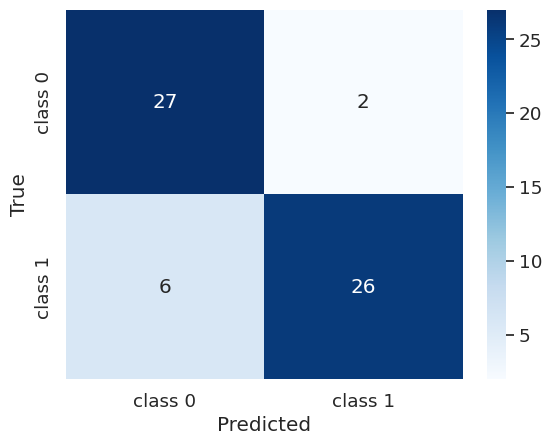

In [66]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
print(classification_report(ytest, y_pred, target_names=target_names))
accuracy = accuracy_score(y_pred, ytest)
print("Accuracy score on test set:", accuracy)


cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logisticscore = accuracy*100

## **KNN**

              precision    recall  f1-score   support

     class 0       0.89      0.86      0.88        29
     class 1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Best accuracy on test set: 0.9508196721311475


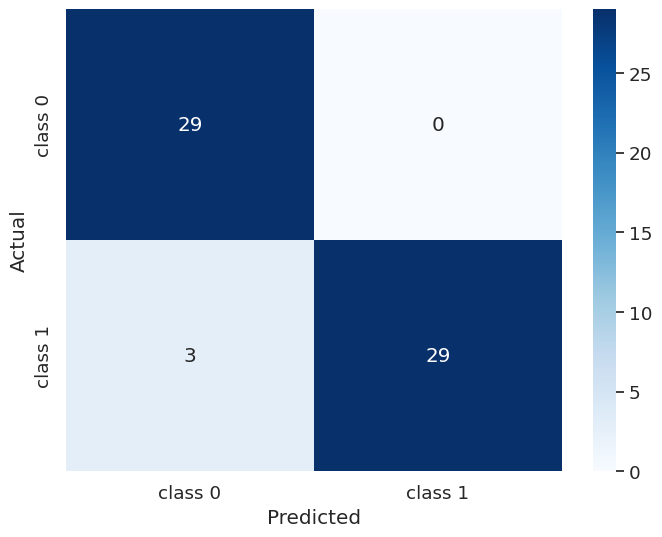

In [67]:
accuracy_list = []
best_accuracy = 0
for k in range(4, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    y_pred = knn.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    accuracy_list.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_predictions = y_pred
print(classification_report(ytest, y_pred, target_names=target_names))
print('Best accuracy on test set:', best_accuracy)

cm = confusion_matrix(ytest, best_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Knnscore = best_accuracy*100    


**This is the best accuracy that I got and achieved the goal of the project that was to achieve the highest accuracy or improve the accuracy amongst all the notebooks.**

## **Support Vector Classification**

              precision    recall  f1-score   support

     class 0       0.88      0.97      0.92        29
     class 1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Accuracy score on test set: 0.9180327868852459


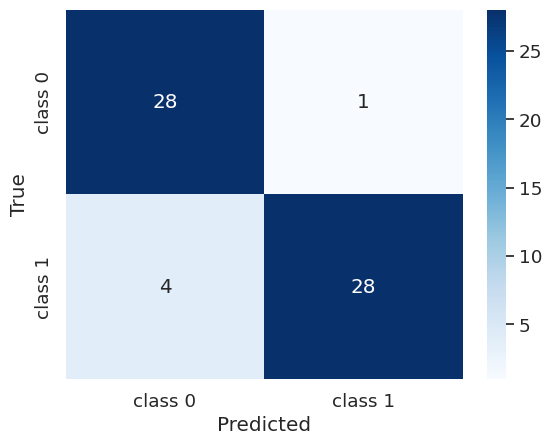

In [68]:
svc = make_pipeline(StandardScaler(), SVC(probability=True))                     
svc.fit(xtrain,ytrain)
y_pred = svc.predict(xtest)


print(classification_report(ytest, y_pred, target_names=target_names))
accuracy = accuracy_score(y_pred, ytest)
print("Accuracy score on test set:", accuracy)


cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Svcscore = accuracy*100

## **Decision Tree**

              precision    recall  f1-score   support

     class 0       0.79      0.90      0.84        29
     class 1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy score on test set: 0.8360655737704918


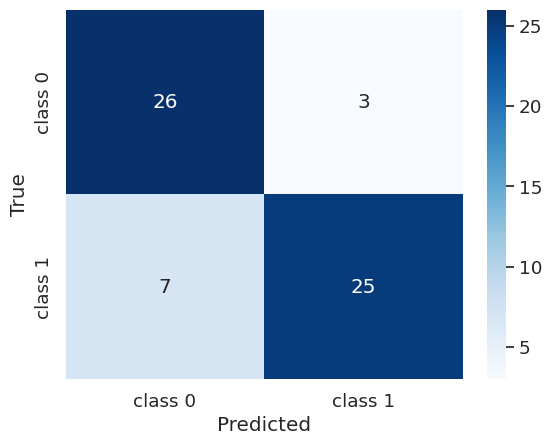

In [69]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

y_pred = dt.predict(xtest)

print(classification_report(ytest, y_pred, target_names=target_names))
accuracy = accuracy_score(y_pred, ytest)
print("Accuracy score on test set:", accuracy)


cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

dtscore = accuracy*100


## **Gaussian Naive Bayes**

              precision    recall  f1-score   support

     class 0       0.87      0.90      0.88        29
     class 1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Accuracy score on test set: 0.8852459016393442


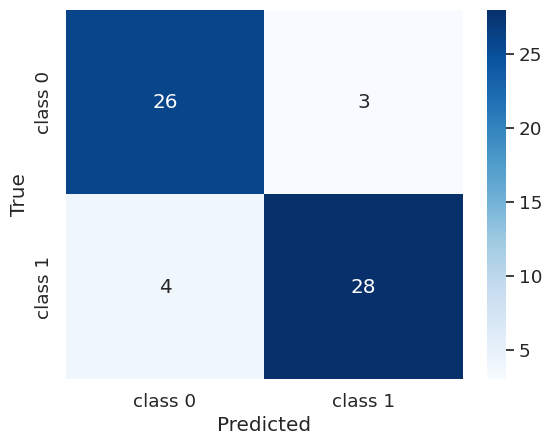

In [70]:
gcla = GaussianNB()
gcla.fit(xtrain, ytrain)
y_pred = gcla.predict_proba(xtest)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(ytest, y_pred, target_names=target_names))
accuracy = accuracy_score(y_pred, ytest)
print("Accuracy score on test set:", accuracy)


cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

gnbscore = accuracy*100

## **Gradient Boosting Classifier**

              precision    recall  f1-score   support

     class 0       0.83      0.83      0.83        29
     class 1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy score on test set: 0.8360655737704918


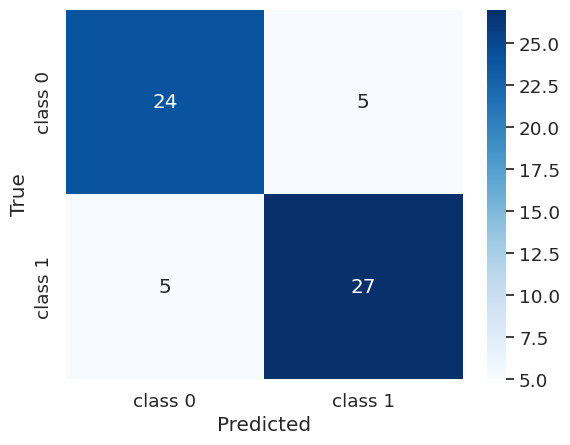

In [71]:
gb = GradientBoostingClassifier(n_estimators=20)
gb.fit(xtrain,ytrain)
y_pred = gb.predict(xtest)
print(classification_report(ytest, y_pred, target_names=target_names))
accuracy = accuracy_score(y_pred, ytest)
print("Accuracy score on test set:", accuracy)


cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

gbcscore = accuracy*100

## **Logistic regression with Hyperparameter tuning**

In [72]:
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': [ 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(xtrain,ytrain)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
y_pred = logreg_cv.predict(xtest)
print("Test accuracy: {}".format(accuracy_score(y_pred, ytest)))

Tuned hyperparameters : {'C': 1.0, 'penalty': 'l2'}
Test accuracy: 0.8688524590163934


The accuracy still remains the same so tuning is not effective.

## **Random Forest**

              precision    recall  f1-score   support

     class 0       0.89      0.86      0.88        29
     class 1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy score on test set: 0.8852459016393442


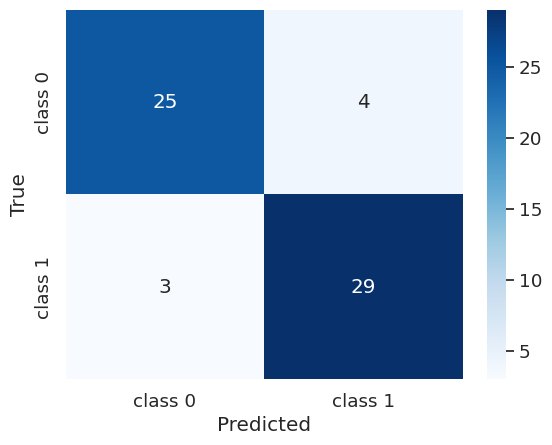

In [73]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
y_pred = rf.predict(xtest)
print(classification_report(ytest, y_pred, target_names=target_names))
accuracy = accuracy_score(y_pred, ytest)
print("Accuracy score on test set:", accuracy)


cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

rfcscore = accuracy*100

##**Random forest with modification**

Classification report:
               precision    recall  f1-score   support

     class 0       0.86      0.83      0.84        29
     class 1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Best accuracy on test set: 0.9180327868852459


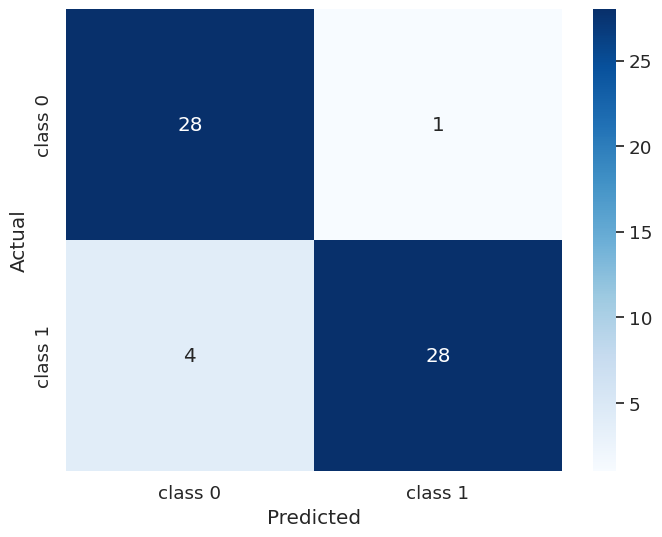

In [74]:
accuracy_list = []
best_accuracy = 0
for k in range(4, 40):
    rfc = RandomForestClassifier(n_estimators = k)
    rfc.fit(xtrain, ytrain)
    y_pred = rfc.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    accuracy_list.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_predictions = y_pred

print('Classification report:\n', classification_report(ytest, y_pred, target_names=target_names))
print('Best accuracy on test set:', best_accuracy)

cm = confusion_matrix(ytest, best_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

rfcmodifiedscore = best_accuracy*100

##**Plotting all the scores obtained**

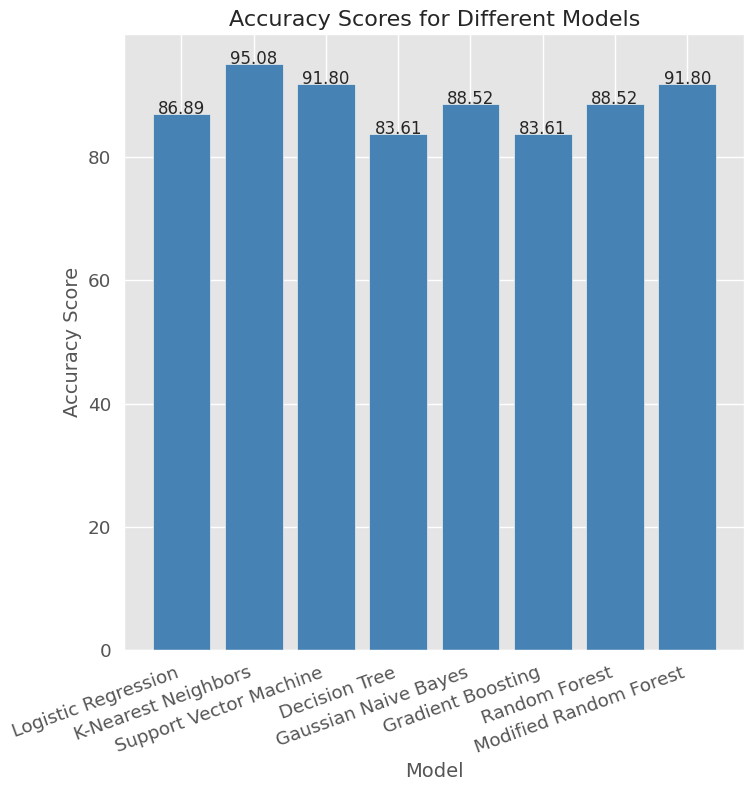

In [75]:

accuracy_scores = [Logisticscore, Knnscore, Svcscore, dtscore, gnbscore, gbcscore,rfcscore,rfcmodifiedscore]
accuracy_labels = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Gaussian Naive Bayes', 'Gradient Boosting', 'Random Forest', 'Modified Random Forest']
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(accuracy_labels, accuracy_scores, color='steelblue')
ax.set_title('Accuracy Scores for Different Models', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy Score', fontsize=14)
for index, score in enumerate(accuracy_scores):
    y_pos = score + 0.02
    plt.text(index, y_pos, f'{score:.2f}', ha='center', fontsize=12)
plt.xticks(rotation=20, ha='right')
plt.show()


##**Ensemble modelling**

In [76]:
xtrain, X_val, ytrain, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

svm_preds = svc.predict_proba(X_val)
rf_preds = rfc.predict_proba(X_val)
gb_preds = gb.predict_proba(X_val)

nn_input = np.concatenate([svm_preds, rf_preds, gb_preds], axis=1)

model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(nn_input, y_val, epochs=10, batch_size=32)

# Make predictions on test set
svm_preds_test = svc.predict_proba(xtest)
rf_preds_test = rf.predict_proba(xtest)
gb_preds_test = gb.predict_proba(xtest)

nn_input_test = np.concatenate([svm_preds_test, rf_preds_test, gb_preds_test], axis=1)

y_pred = model.predict(nn_input_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]

# Calculate accuracy score
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy score of combined model: {accuracy}")

Epoch 1/10
2/2 [==============================] - 1s 10ms/step - loss: 0.7956 - accuracy: 0.1429
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 0.7633 - accuracy: 0.3061
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 0.7327 - accuracy: 0.5102
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.7031 - accuracy: 0.5102
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6740 - accuracy: 0.5102
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6469 - accuracy: 0.6531
Epoch 7/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6200 - accuracy: 0.9184
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 0.5942 - accuracy: 0.9388
Epoch 9/10
2/2 [==============================] - 0s 11ms/step - loss: 0.5704 - accuracy: 0.9592
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Accuracy score of combined model: 0.9016393442622951


## **Deep Learning**

In [77]:
def DeepLearningModel(input_shape):
    model = Sequential()
    
    model.add(Dense(16, input_shape=input_shape, kernel_initializer=GlorotUniform()))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    
    model.add(Dense(32, kernel_initializer=GlorotUniform()))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    
    model.add(Dense(64, kernel_initializer=GlorotUniform()))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform()))    
    
    return model

model = DeepLearningModel((14,))
print(model.summary())

def lr_scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * 0.1

lr = 0.003
epochs = 40
batch_size = 100
optimizer = Adam(lr)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=epochs, batch_size=batch_size, callbacks=[LearningRateScheduler(lr_scheduler)], verbose =0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                240       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16)                0         
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                      

2/2 [==============================] - 0s 8ms/step


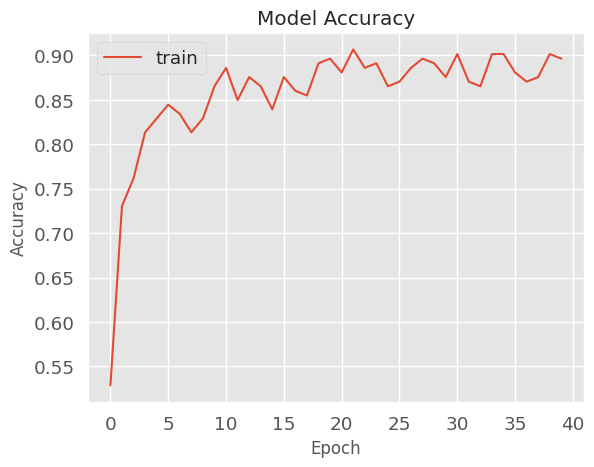

In [78]:
# Train the model
model.fit(xtrain, ytrain, batch_size=batch_size, callbacks=[LearningRateScheduler(lr_scheduler)])

# Evaluate the model
loss, accuracy = model.evaluate(xtest, ytest, verbose=0)

# Make predictions on the test set
y_pred = model.predict(xtest)
y_pred = np.where(y_pred > 0.5, 1, 0)

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='train')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()